First Five Rows of Dataset

In [2]:
import pandas as pd

df = pd.read_csv('Customer-Churn-Records.csv')
df.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

Columns of the dataset

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

Is there any null values column in dataset

In [7]:
df.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

Excluded useless columns

In [11]:
excluded_column =['RowNumber','CustomerId']
df.drop(columns=excluded_column).describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Checks for duplicates

In [21]:
df.duplicated().sum()

0

Info on dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

Checks how many values in column is unique

In [13]:
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

Visualization of the data

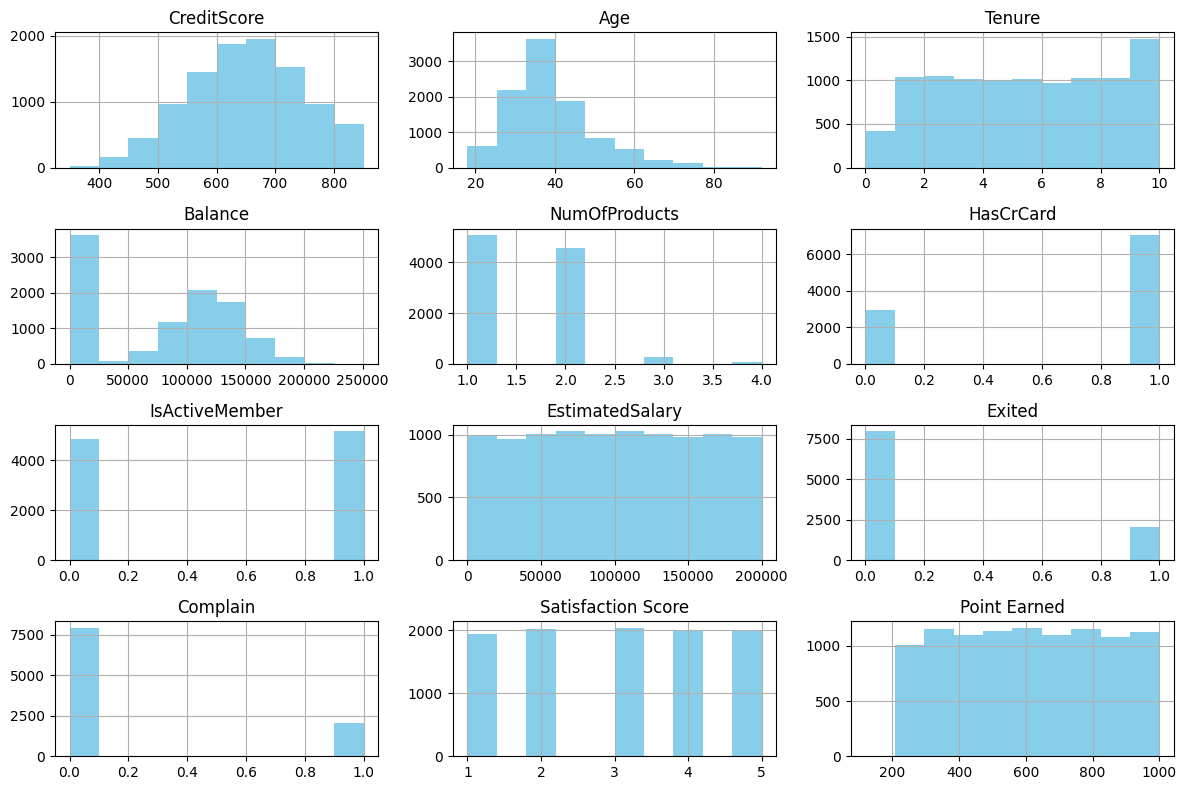

<Axes: xlabel='CreditScore', ylabel='count'>

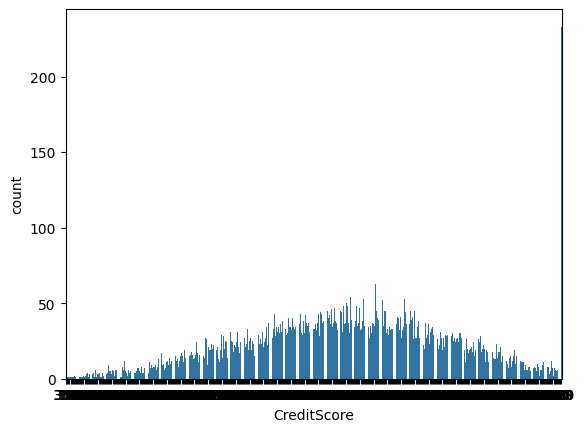

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

exclude_col= ['RowNumber','CustomerId']
columns_to_show =[col for col in df.select_dtypes(include='number').columns if col not in exclude_col]
df[columns_to_show].hist(figsize=(12,8),color='skyblue')
plt.tight_layout()
plt.show()


sns.countplot(data=df, x='CreditScore')

Filters


In [34]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Checks the active Members based on Gender

In [35]:
df[df['IsActiveMember']==1]['Gender'].value_counts()

Gender
Male      2867
Female    2284
Name: count, dtype: int64

In [38]:
df.groupby('Gender')['IsActiveMember'].sum()

Gender
Female    2284
Male      2867
Name: IsActiveMember, dtype: int64

Inactive Members based on Gender


In [39]:
df[df['IsActiveMember']==0]['Gender'].value_counts()

Gender
Male      2590
Female    2259
Name: count, dtype: int64

Visualization of Active Vs. Inactive Members by Gender

In [ ]:
#Group Count Dataframe
gender_active_counts = df.groupby(['Gender', 'IsActiveMember']).size().reset_index(name='Count')

#1 for Active Members 0 for Inactive Members
gender_active_counts['Status']= gender_active_counts['IsActiveMember'].map({1:'Active', 0:'Inactive'})

#plot
